<a href="https://colab.research.google.com/github/alunfes/1m-btc-data/blob/master/LGBM_Trading_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip uninstall --yes lightgbm && pip install --install-option=--gpu lightgbm

Found existing installation: lightgbm 2.2.3
Uninstalling lightgbm-2.2.3:
  Successfully uninstalled lightgbm-2.2.3
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 28.6 MB/s 
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done


In [ ]:
'''
!sudo rm -rf /content/LightGBM
!git clone --recursive https://github.com/Microsoft/LightGBM
#!git clone --recursive https://github.com/microsoft/LightGBM/tree/v2.3.1
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd ./python-package
!sudo python setup.py install --precompile
'''

In [4]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!wget https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2022-07-06 07:14:39--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving sourceforge.net (sourceforge.net)... 104.18.34.243, 172.64.153.13
Connecting to sourceforge.net (sourceforge.net)|104.18.34.243|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/ [following]
--2022-07-06 07:14:39--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download [following]
--2022-07-06 07:14:39--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Locat

In [5]:
!pip install optuna
!pip install joblib
!pip install six
!pip install bayesian-optimization
!pip install stable-baselines3 --upgrade
!pip install tensorboardcolab
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
from sklearn import datasets
import dateutil
import copy
import sqlite3
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
import csv
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
from numba import njit
from numba import prange
from numba.typed import List
import pandas as pd
#from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random
import collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 19.0 MB/s 
     |████████████████████████████████| 209 kB 59.3 MB/s 
     |████████████████████████████████| 81 kB 11.7 MB/s 
     |████████████████████████████████| 78 kB 10.2 MB/s 
     |████████████████████████████████| 146 kB 60.4 MB/s 
     |████████████████████████████████| 112 kB 72.6 MB/s 
     |████████████████████████████████| 49 kB 8.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6428edac9c863d2669677ab0edcac68976f2a88a5625225955646f859099fc25
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking i

In [6]:
class MarketData:
    @classmethod
    def initialize(cls):
        cls.terms = [5, 15, 25, 50, 100, 240, 1440]
        cls.df = pd.DataFrame()
        cls.tp = []
        cls.open = []
        cls.high = []
        cls.low = []
        cls.close = []
        cls.vol = []
        cls.ma = {}
        cls.ma_kairi = {}
        cls.rsi = {}
        cls.atr = {}
        cls.__read_data()
        cls.__calc_index()
        print('initialized MarketData')
    
    @classmethod
    def __read_data(cls):
        cls.df = pd.read_csv('/content/drive/My Drive/BTC-PERP-1mcp.csv')
        cls.tp = list(pd.read_csv('/content/drive/My Drive/tp ptlc.csv')['tp'])
        cls.ts = list(cls.df['ts'])
        cls.open = list(cls.df['open'])
        cls.high = list(cls.df['high'])
        cls.low = list(cls.df['low'])
        cls.close = list(cls.df['close'])
        cls.vol = list(cls.df['volume'])


    @classmethod
    def __calc_index(cls):
        for term in cls.terms:
            cls.ma[term] = cls.__calc_ma(term)
            cls.ma_kairi[term] = cls.__calc_ma_kairi(term)
            cls.rsi[term] = cls.__calc_rsii(term)
            cls.atr[term] = cls.__calc_atr(term)

    @classmethod
    def __calc_ma(cls, term):
        return list(ta.MA(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_ma_kairi(cls, term):
        ma = cls.__calc_ma(term)
        return list(map(lambda c, e: (c - e) / e, np.array(cls.close, dtype='f8'), np.array(ma, dtype='f8')))
    
    @classmethod
    def __calc_rsii(cls, term):
        return ta.RSI(np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_atr(cls, term):
        return ta.ATR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)

In [7]:
class Account:
    def __init__(self):
        self.asset = 100000
        self.fee = 0.00075
        self.slip_page = 1.0 #usd
        self.lot_size = 1.0
        self.initialize_holding_data()
        self.initialize_performance_data()


    def initialize_holding_data(self):
        self.holding_side= ''
        self.holding_price = 0.0
        self.holding_lot = 0.0
        self.holding_i = 0
    
    def initialize_performance_data(self):
        self.total_pl = 0.0
        self.total_pl_log = []
        self.total_asset_log = []
        self.holding_side_log = []
        self.total_fee = 0.0
        self.realized_pl = 0.0
        self.unrealized_pl = 0.0
        self.num_trade = 0
        self.num_win = 0
        self.win_rate = 0.0
    
    def move_to_next(self, i):
        if self.holding_side != '':
            self.unrealized_pl = self.holding_lot * MarketData.close[i] * (MarketData.close[i] - self.holding_price if self.holding_side == 'buy' else self.holding_price - MarketData.close[i]) / self.holding_price
        else:
            self.unrealized_pl = 0.0
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
    
    def last_day(self,i):
        if self.holding_side != '':
            self.exit_process(MarketData.close[i], i)
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.win_rate = self.num_win / self.num_trade

    def entry_order(self, i, side):
        if self.holding_side == '': #new entry
            self.holding_side = side
            self.holding_price = MarketData.close[i] + self.slip_page if side == 'buy' else MarketData.close[i] - self.slip_page
            self.holding_lot = self.lot_size * self.asset / MarketData.close[i]
            self.holding_i = i
            self.total_fee += self.fee * self.holding_lot * MarketData.close[i]
        elif self.holding_side == side:
            print('Additional entry is not allowed !')
        else:
            self.exit_process(MarketData.close[i], i)
            
    def exit_process(self, price, i):
        self.total_fee += self.fee * self.holding_lot * price
        pl = self.holding_lot * price * (price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price) / self.holding_price
        self.num_trade +=1
        if pl > 0:
            self.num_win += 1
        self.realized_pl += pl
        self.initialize_holding_data()

In [8]:
class Strategy:
    @classmethod
    def lgbm_tp_simple(cls, i, pred_ind:int, ac:Account, pred, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
        return side
        

    @classmethod
    def __check_pt_lc(cls, i, ac:Account, pt, lc):
        if ac.holding_side !='':
            pl = (MarketData.close[i] - ac.holding_price) / ac.holding_price if ac.holding_side == 'buy' else (ac.holding_price - MarketData.close[i]) / ac.holding_price
            if pl >= pt:
                return 'pt'
            elif pl <= lc:
                return 'lc'
            else:
                return 'none'
        else:
            return 'none'

In [9]:
class Sim:
    def lgbm_simple(self, from_ind, pred, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_simple(i, pred_ind, ac, pred, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac

In [64]:
class LGBMDataGenerator:
    def generate_lgbm_data(self, pt, lc):
        lgbm_data = pd.DataFrame()
        lgbm_data = self.__generate_ma_kairi_df()
        lgbm_data = pd.concat([lgbm_data, self.__generate_rsi_df()], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_atr_df()], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_tp()], axis=1)
        return lgbm_data

    def convert_lgbm_train_test_data(self, df:pd.DataFrame):
        df = df.iloc[2000:]
        df = df.iloc[:len(df) - 2000]
        train, test = train_test_split(df, train_size = 0.8, test_size = 0.2, shuffle=False)
        #train = self.sampling_train_data(train, 0.1, 0.3)
        train, valid = train_test_split(train, train_size = 0.9, test_size = 0.1, shuffle=True)
        train_x = train.drop('tp', axis =1)
        train_y = train['tp']
        valid_x = valid.drop('tp', axis =1)
        valid_y = valid['tp']
        test_x = test.drop('tp', axis=1)
        test_y = test['tp']
        return train_x, train_y, valid_x, valid_y, test_x, test_y

    
    def sampling_train_data(self, train_df, none_sampling_ratio, buysell_sampling_ratio):
        main_df = pd.DataFrame()
        zero_df = train_df.query('tp == 0')
        one_df = train_df.query('tp == 1')
        two_df = train_df.query('tp == 2')
        zero_df = self.sampling(zero_df, none_sampling_ratio)
        main_df = pd.concat([main_df, zero_df])
        one_df = self.sampling(one_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, one_df])
        two_df = self.sampling(two_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, two_df])
        return main_df
    
    def sampling(self, df, sampling_ratio):
        res = []
        sampling_window = round(len(df) / (len(df) * sampling_ratio))
        i = 0
        while True:
            res.append(df.iloc[i])
            i += sampling_window
            if i >= len(df):
                break
        return pd.DataFrame(res)


    def __generate_ma_kairi_df(self):
        kairi = {}
        for term in MarketData.terms:
            kairi['ma_kairi_'+str(term)] = MarketData.ma_kairi[term]
        return pd.DataFrame(kairi)
    
    def __generate_rsi_df(self):
        rsi = {}
        for term in MarketData.terms:
            rsi['rsi_'+str(term)] = MarketData.rsi[term]
        return pd.DataFrame(rsi)
    
    def __generate_atr_df(self):
        atr = {}
        for term in MarketData.terms:
            atr['atr_'+str(term)] = MarketData.atr[term]
        return pd.DataFrame(atr)

    def __generate_tp(self):
        tp_df = {}
        tp_df['tp'] = MarketData.tp
        return pd.DataFrame(tp_df)

    def tp_detect_normal_process(self, buy_sell, entry_price, from_ind, pt, lc):
        log_from_ind = from_ind
        while True:
            if buy_sell == 'buy':
                if MarketData.close[from_ind] > entry_price * (1.0 + pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] <= entry_price * (1.0 -lc):
                    return {'ptlc':'lc', 'i':from_ind}
            else:
                if MarketData.close[from_ind] < entry_price * (1.0 - pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return {'ptlc':'lc', 'i':from_ind}
            from_ind += 1
            if from_ind >= len(MarketData.close):
                return {'ptlc':'n/a', 'i':from_ind}


    def tp_detection_enhanced_process(self, buy_sell, ref_entry_price, ref_pt_lc, entry_price):
        if buy_sell == 'buy':
            if ref_pt_lc == 'pt':
                if ref_entry_price >= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price <= entry_price:
                    return 'lc'
                else:
                    return 'n/a'
        else:
            if ref_pt_lc == 'pt':
                if ref_entry_price <= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price >= entry_price:
                    return 'lc'
                else:
                    return 'n/a'


    def __generate_ptlc_point_data(self, pt, lc):
        #generate ptlc point data
        buy_sell_ptlc_points = [] #0:no, 1:buy, 2:sell
        for i in range(len(MarketData.close)):
            buy_check = self.__check_pt_lc(i, 'buy', pt, lc)
            sell_check = self.__check_pt_lc(i, 'sell', pt, lc)
            if buy_check > 0 and sell_check < 0: #only buy hit
                buy_sell_ptlc_points.append(1)
            elif buy_check < 0 and sell_check > 0: #only sell hit
                buy_sell_ptlc_points.append(2)
            elif buy_check > 0 and sell_check > 0: #both buy & sell hit
                if buy_check < sell_check: #buy hit comes first
                    buy_sell_ptlc_points.append(1)
                else:
                    buy_sell_ptlc_points.append(2)
            else:
                buy_sell_ptlc_points.append(0)
        return buy_sell_ptlc_points.append


    def __check_pt_lc(self, i:int, buy_or_sell:str, pt:float, lc:float):        
        entry_price = MarketData.close[i]
        while True:
            if buy_or_sell == 'buy':
                if MarketData.close[i] * (1.0 - pt) > entry_price:
                    return i
                elif MarketData.close[i] <= entry_price * (1.0 - lc):
                    return -1
            elif buy_or_sell == 'sell':
                if MarketData.close[i] * (1.0 + pt) < entry_price:
                    return i
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return -1
            i += 1
            if i >= len(MarketData.close):
                break
        return -1


In [65]:
MarketData.initialize()
ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data(0.05, 0.005)
train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df)

initialized MarketData


training data description
train_x: (1029426, 21)
train_y: (1029426,)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


ストリーミング出力は最後の 5000 行に切り捨てられました。
[5005]	valid_0's multi_logloss: 0.396561
[5006]	valid_0's multi_logloss: 0.396533
[5007]	valid_0's multi_logloss: 0.396511
[5008]	valid_0's multi_logloss: 0.396493
[5009]	valid_0's multi_logloss: 0.396475
[5010]	valid_0's multi_logloss: 0.396464
[5011]	valid_0's multi_logloss: 0.39643
[5012]	valid_0's multi_logloss: 0.396407
[5013]	valid_0's multi_logloss: 0.396392
[5014]	valid_0's multi_logloss: 0.396368
[5015]	valid_0's multi_logloss: 0.396342
[5016]	valid_0's multi_logloss: 0.396323
[5017]	valid_0's multi_logloss: 0.396311
[5018]	valid_0's multi_logloss: 0.396284
[5019]	valid_0's multi_logloss: 0.396277
[5020]	valid_0's multi_logloss: 0.396241
[5021]	valid_0's multi_logloss: 0.396209
[5022]	valid_0's multi_logloss: 0.396194
[5023]	valid_0's multi_logloss: 0.396169
[5024]	valid_0's multi_logloss: 0.396145
[5025]	valid_0's multi_logloss: 0.39611
[5026]	valid_0's multi_logloss: 0.396093
[5027]	valid_0's multi_logloss: 0.396082
[5028]	valid_0's multi_logl

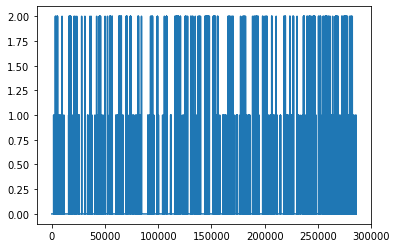

In [76]:
class LGBM:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgbm_tp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)
    
    def save_model(self, model):
        file = '/content/drive/My Drive/Model/lgbm_tp_model.dat'
        pickle.dump(model, open(file, 'wb'))

    def train(self, train_x, train_y, valid_x, valid_y):
        print('training data description')
        print('train_x:', train_x.shape)
        print('train_y:', train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        valid = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32))
        lgbm_params = {
            'objective' : 'multiclass',
            'num_class': 3,
            'boosting': 'gbdt',
            'tree_learner': 'data',
            'learning_rate':0.1,
            'num_iterations':1000,
            'lambda_l1':1.0,
            'lambda_l2':1.0,
            'extra_trees': True,
            'device_type':'gpu',
            'verbosity':-1,
        }
        model = lgb.train(
            lgbm_params, 
            train,
            valid_sets=[valid],
            callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=True),
                           lgb.log_evaluation(1)]
            )
        return model
    
    def prediction(self, model, test_x, test_y):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(np.argmax(p))
        self.check_matched_rate(prediction, test_y)
        return prediction
    
    def check_matched_rate(self, pred, test_y):
        print('modelがbuy / sellを予測したときにそれが正しい確率')
        num_match = 0
        target = 0
        for i in range(len(pred)):
            if pred[i] != 0:
                target += 1
                if pred[i] == test_y.iloc[i]:
                    num_match += 1
        if target > 0:
            print('match rate=', num_match / target)
        else:
            print('match rate=', 0)

lgbm = LGBM()
model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y))
lgbm.save_model(model)
pred = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
plt.plot(pred)
#lgb.plot_metric(model)

total pl= -33223.40540517049 , num trade= 279 , win rate= 0.11469534050179211


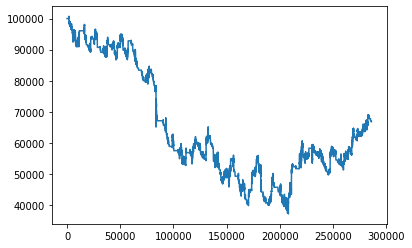

In [77]:
sim = Sim()
ac = Account()
ac = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.005)
print('total pl=', ac.total_pl, ', num trade=', ac.num_trade, ', win rate=', ac.win_rate)
plt.plot(ac.total_asset_log)

In [35]:
test = lgbm_df[2000:]
test.iloc[10:]

,ma_kairi_5,ma_kairi_15,ma_kairi_25,ma_kairi_50,ma_kairi_100,ma_kairi_240,ma_kairi_1440,rsi_5,rsi_15,rsi_25,...,rsi_240,rsi_1440,atr_5,atr_15,atr_25,atr_50,atr_100,atr_240,atr_1440,tp
2010,-0.000684,-0.000032,-0.001451,-0.000553,0.006294,0.016814,0.015876,45.270068,48.310051,51.732215,...,56.123828,51.320150,12.382129,16.102867,16.564990,15.123191,12.216364,9.113638,7.193867,0.0
2011,-0.001013,-0.000701,-0.002176,-0.001561,0.005237,0.015866,0.015009,35.610230,45.582549,50.006757,...,55.774071,51.250474,11.755703,15.646009,16.272390,15.005727,12.186700,9.114206,7.195295,0.0
2012,-0.000721,-0.000572,-0.002055,-0.001712,0.005030,0.015770,0.015000,35.610230,45.582549,50.006757,...,55.774071,51.250474,11.454562,15.286275,16.031495,14.910613,12.167333,9.118939,7.197416,0.0
2013,-0.000726,-0.000948,-0.002313,-0.002302,0.004374,0.015212,0.014528,30.172493,44.039690,49.047260,...,55.585257,51.212838,11.263650,14.967190,15.810235,14.822400,12.150660,9.124693,7.199709,0.0
2014,-0.000096,-0.000540,-0.001680,-0.001971,0.004610,0.015556,0.014959,40.890924,45.903426,49.996697,...,55.728234,51.246874,12.010920,14.969377,15.777826,14.825952,12.179153,9.149173,7.205126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433754,-0.001481,-0.001991,-0.002505,-0.002929,-0.001765,0.000640,-0.011007,13.822261,27.059825,35.167693,...,48.048295,48.774333,33.557890,25.319625,24.578750,26.282326,30.265077,32.448032,26.642648,NaN
1433755,-0.001472,-0.002298,-0.002872,-0.003366,-0.002295,0.000145,-0.011501,11.193479,24.589526,33.094287,...,47.828043,48.731028,33.446312,25.831650,24.915600,26.416679,30.292426,32.450331,26.647062,NaN
1433756,-0.000506,-0.001590,-0.002214,-0.002772,-0.001779,0.000696,-0.010958,28.933026,31.612981,37.147340,...,48.078993,48.778813,34.157050,26.576207,25.398976,26.628346,30.359502,32.469288,26.654252,NaN
1433757,0.000537,-0.000655,-0.001304,-0.001917,-0.000993,0.001517,-0.010137,48.520313,40.639326,42.660868,...,48.458354,48.851507,35.125640,27.404460,25.943017,26.875779,30.445907,32.496500,26.662825,NaN


In [62]:
test_x

,ma_kairi_5,ma_kairi_15,ma_kairi_25,ma_kairi_50,ma_kairi_100,ma_kairi_240,ma_kairi_1440,rsi_5,rsi_15,rsi_25,...,rsi_100,rsi_240,rsi_1440,atr_5,atr_15,atr_25,atr_50,atr_100,atr_240,atr_1440
1145807,0.000251,0.000472,0.000214,0.000426,-0.001097,0.000933,0.025926,58.930956,51.771210,50.245804,...,49.824855,50.288753,52.271761,49.239517,56.810433,58.412538,60.705281,64.893769,68.785195,66.040540
1145808,0.000317,0.000738,0.000452,0.000626,-0.000902,0.001117,0.026049,61.809381,52.635653,50.752118,...,49.940664,50.334282,52.279510,44.191613,54.623071,57.036036,59.971176,64.484831,68.598590,66.011345
1145809,-0.000637,-0.000109,-0.000405,-0.000245,-0.001791,0.000212,0.025052,41.303927,47.469841,47.876264,...,49.289486,50.073316,52.231426,46.953291,54.848200,57.074595,59.931752,64.419983,68.554429,66.005782
1145810,0.001012,0.001633,0.001353,0.001552,0.000045,0.002046,0.026872,67.627040,56.449242,53.283123,...,50.566115,50.577844,52.317478,63.362633,59.791653,59.951611,61.313117,65.065783,68.806286,66.049528
1145811,0.001015,0.001857,0.001571,0.001859,0.000384,0.002377,0.027162,70.594217,57.839142,54.174413,...,50.791354,50.667953,52.332945,57.490106,58.072210,58.913547,60.766855,64.755125,68.661260,66.027271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431754,0.000141,-0.000148,-0.000555,-0.001954,-0.002182,-0.002655,0.001360,48.148447,38.125204,38.114345,...,45.787691,49.030317,49.180108,16.505088,15.222733,14.400213,14.370852,15.554879,16.632725,26.848151
1431755,0.000212,-0.000040,-0.000412,-0.001825,-0.002092,-0.002577,0.001432,51.789478,39.435722,38.911797,...,45.945896,49.089131,49.186765,15.804070,15.074551,14.344205,14.343435,15.529330,16.617588,26.838534
1431756,0.000176,0.000029,-0.000284,-0.001690,-0.002004,-0.002500,0.001504,55.679707,40.779612,39.720912,...,46.104765,49.148053,49.193425,14.243256,14.602914,14.090436,14.216566,15.454037,16.581682,26.825452
1431757,-0.000060,-0.000183,-0.000462,-0.001846,-0.002215,-0.002725,0.001273,42.745152,38.064710,38.142180,...,45.697768,48.977287,49.174076,14.994605,14.829387,14.246819,14.292235,15.479496,16.587591,26.819323


In [60]:
test_y

1145807    0.0
1145808    0.0
1145809    0.0
1145810    0.0
1145811    0.0
          ... 
1431754    NaN
1431755    NaN
1431756    NaN
1431757    NaN
1431758    NaN
Name: tp, Length: 285952, dtype: float64